<a href="https://colab.research.google.com/github/afathelbab/GRIP-July22/blob/main/Prediction_of_Student_Grade_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Student Grade Prediction using Supervised ML**
This code is part of The Sparks Foundation Graduate Rotational Internship Program (GRIP) - July 2022 Cohort

Dataset for this model is available on this link: http://bit.ly/w-data

## Requirements:
1. Building Linear Regression Model to predict Student Score based on Daily Study Hours
2. Apply the model to predict the score that a student will get if they study 9.5 hours/day

##Import Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Data Cleaning

In [41]:
# Importing the data from url into a dataframe
url = "http://bit.ly/w-data"
df = pd.read_csv(url, delimiter=',', engine='python')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [42]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [43]:
# Dataset Description
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [44]:
# Dataset Shape
df.shape

(25, 2)

In [46]:
# Checking for Null Values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

There are no Null values

In [47]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicated data

In [48]:
# Cleaning Columns Names
df.columns = df.columns.str.lower()

Data is Clean.

##Data Visualization

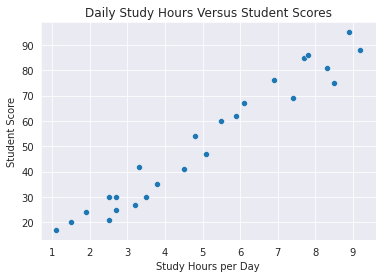

In [49]:
# Setting the Style for the Plots
sns.set_style('darkgrid')

#Scatter Plot
sns.scatterplot(x='hours', y='scores', data=df)
plt.title('Daily Study Hours Versus Student Scores')
plt.xlabel('Study Hours per Day')  
plt.ylabel('Student Score');

From the Chart it's obvious that there is strong positive relation between number of daily study hours and the scores student get.

## Data Preparation

In [50]:
# Defining Independent (X) and Dependent (y) Variables
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [51]:
# Splitting the Data to Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 20 samples.
Testing set has 5 samples.


## Model Training and Testing

In [52]:
# Model Training using Linear Regression Algorithm
learner = LinearRegression()
learner.fit(X_train, y_train) 

#Show the training is completed
print("Training is Completed!")

Training is Completed!


In [53]:
# Testing Data
y_predict = learner.predict(X_test)

#Show the testing is completed
print("Testing is Completed!")

Testing is Completed!


In [54]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Model Evaluation

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict)) 

Mean Absolute Error: 4.183859899002982


## Deploy the Model

In [56]:
# As requested we are going to deploy the model to get the score student will achieve if they study 9.5 hours/day
hours = 9.5
pred_score = learner.predict([[hours]])
print("Daily Study Hours = {}".format(hours))
print("Predicted Studen Score = {}".format(pred_score[0]))

Daily Study Hours = 9.5
Predicted Studen Score = 96.16939660753593
